In [27]:
# importing the required libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score


In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [29]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [30]:
#checking datatypes
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [31]:
# column
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [32]:
df.shape

(1000, 40)

In [33]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

we can see there are unique values is in every column

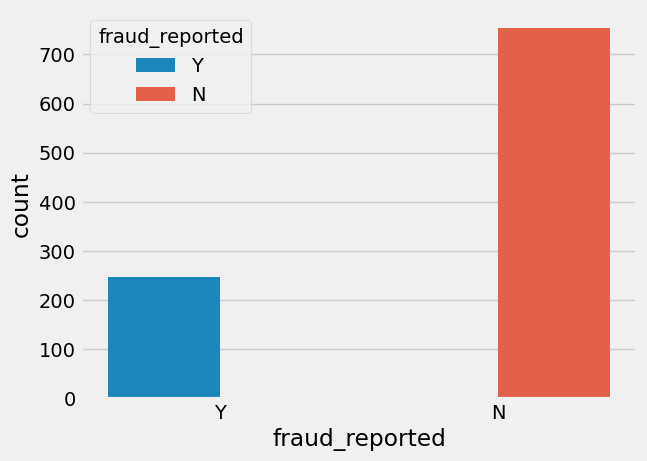

In [34]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x = 'fraud_reported', data =df,hue='fraud_reported')

from the above ploting showing the label distribution is skewed

In [35]:
# checking the count number of fraud vs non frauds
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [36]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

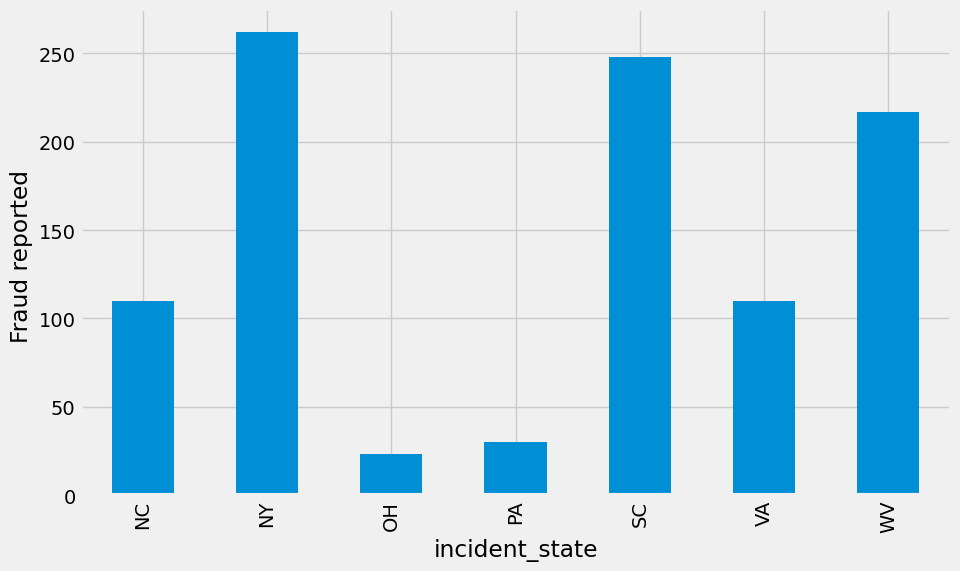

In [37]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(10,6))
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported ')
plt.show()

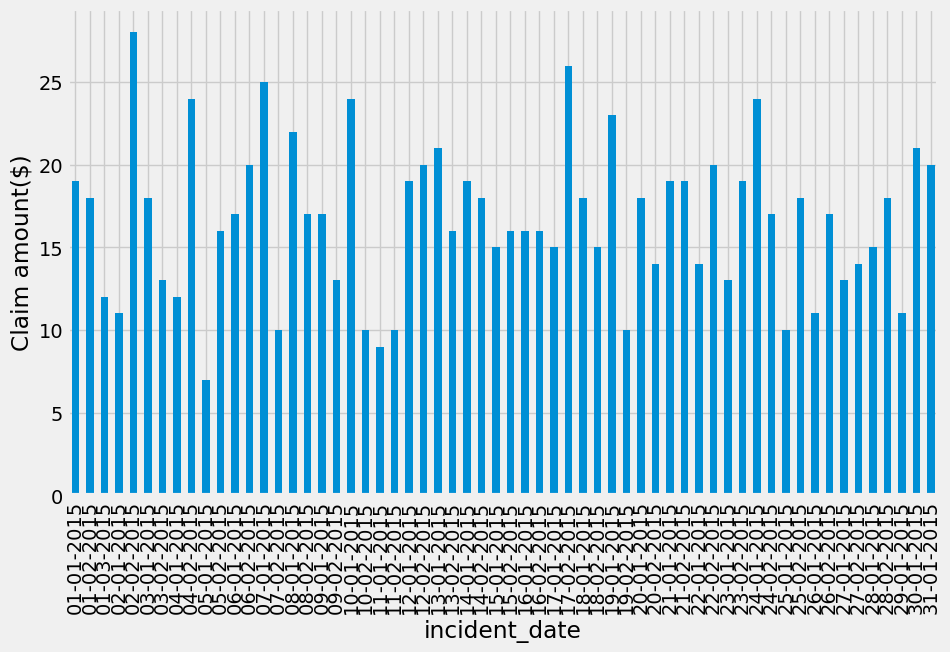

In [38]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(10,6))
ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount($)')
plt.show()

we can see that all the cases are in plot showing for the month of january and fab 2015

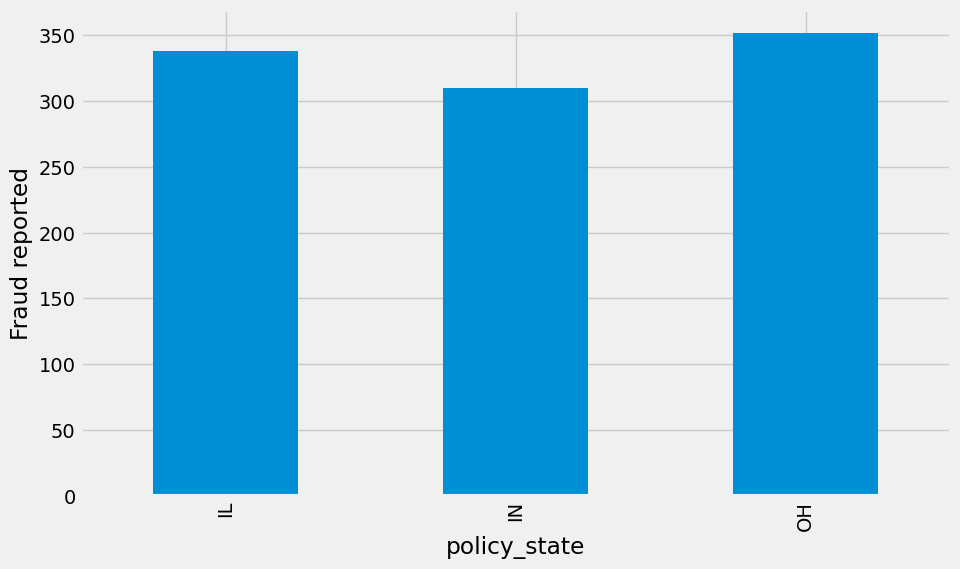

In [39]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(10,6))
ax = df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

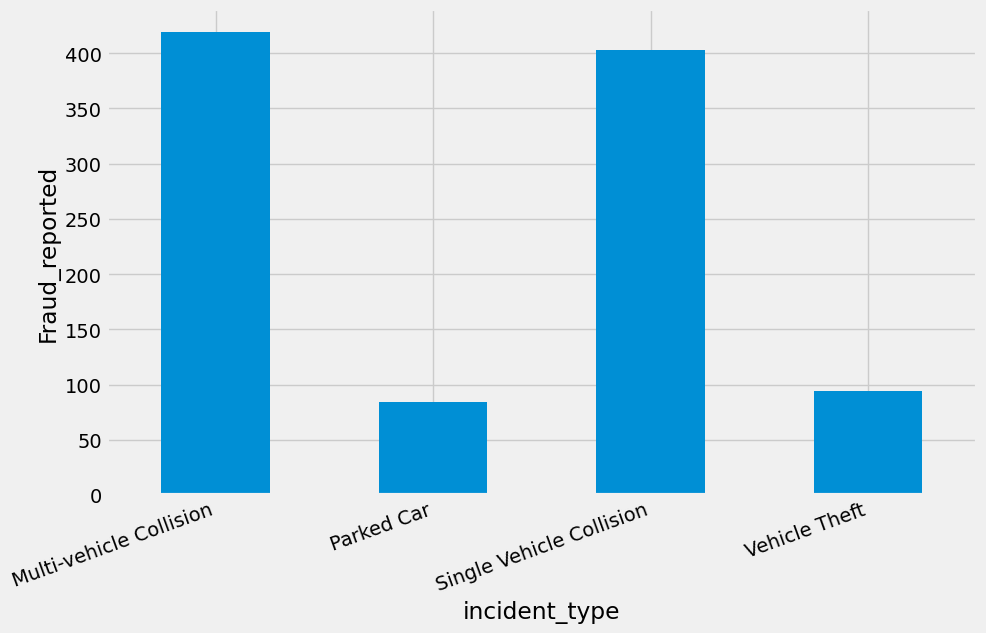

In [40]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(10,6))
ax = df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha ='right')
ax.set_ylabel('Fraud_reported')
plt.show()

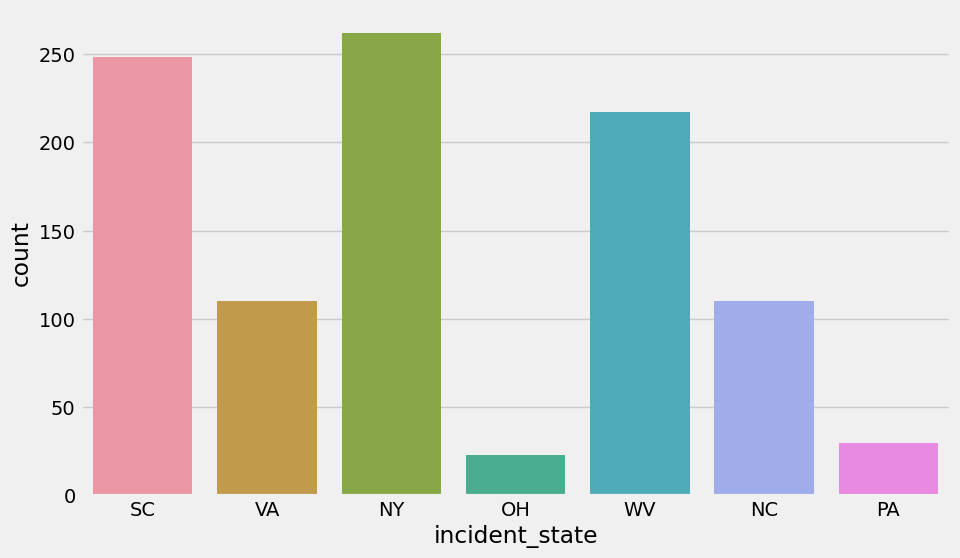

In [41]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(10,6))
ax =sns.countplot(x='incident_state',data=df)

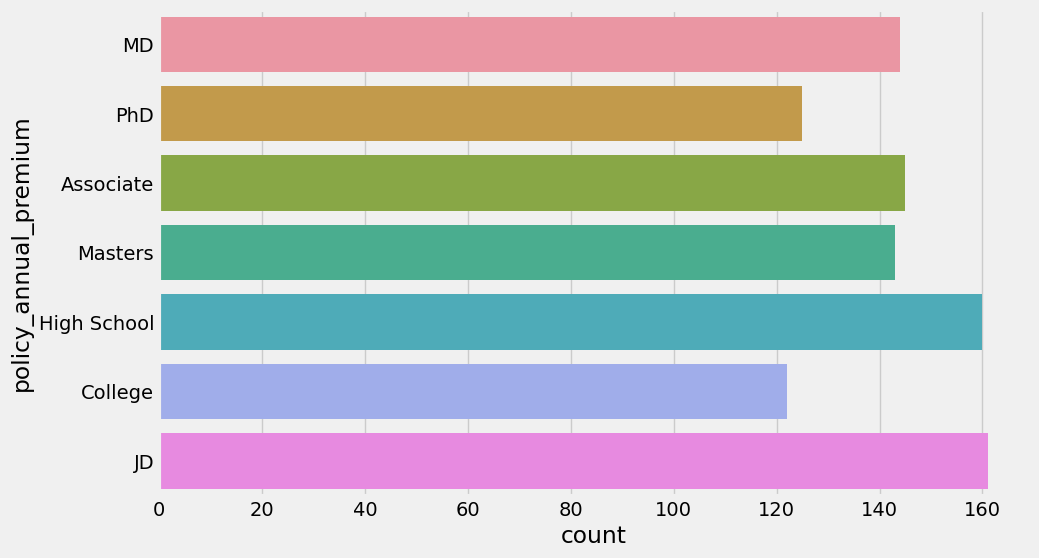

In [42]:
fig=plt.figure(figsize=(10,6))
ax = sns.countplot(y= 'insured_education_level',data=df)

ax.set_ylabel('policy_annual_premium')

plt.show()

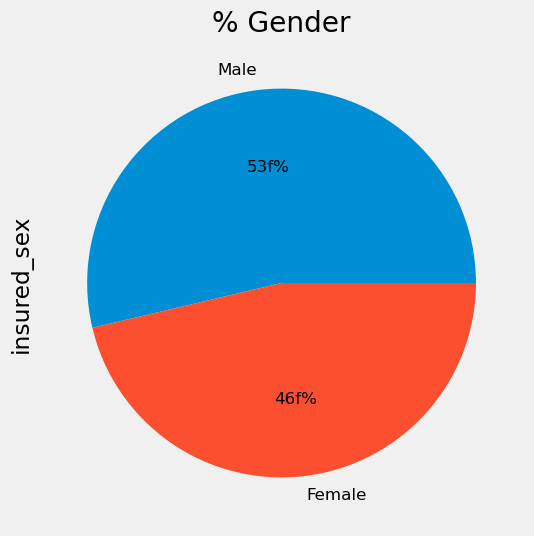

In [43]:
fig=plt.figure(figsize=(10,6))
ax = (df['insured_sex'].value_counts()*100.0/len(df))\
.plot.pie(autopct="%.if%%", labels = ['Male','Female'],fontsize=12)

ax.set_title('% Gender')
plt.show()

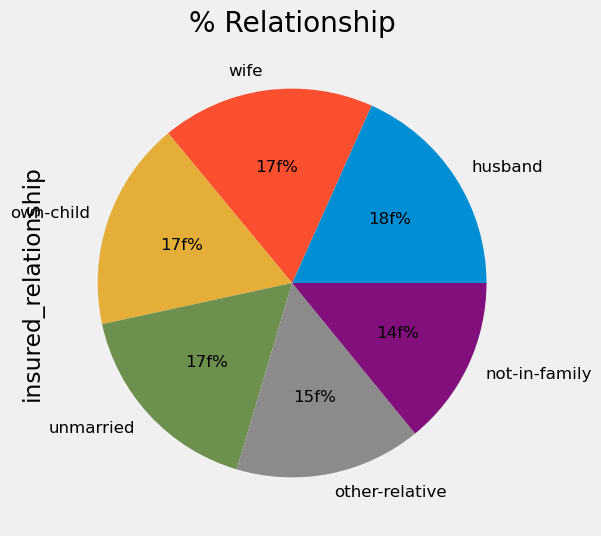

In [44]:
fig=plt.figure(figsize=(10,6))
ax = (df['insured_relationship'].value_counts()*100.0/len(df))\
.plot.pie(autopct="%.if%%", labels = ['husband','wife','own-child','unmarried','other-relative','not-in-family'],fontsize=12)

ax.set_title('% Relationship')
plt.show()

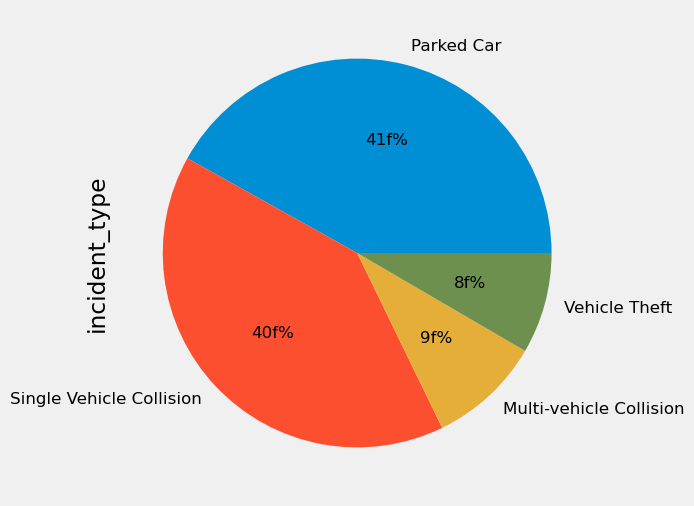

In [45]:
fig=plt.figure(figsize=(10,6))
ax = (df['incident_type'].value_counts()*100.0/len(df))\
.plot.pie(autopct="%.if%%", labels = ['Parked Car','Single Vehicle Collision','Multi-vehicle Collision','Vehicle Theft'],fontsize=12)


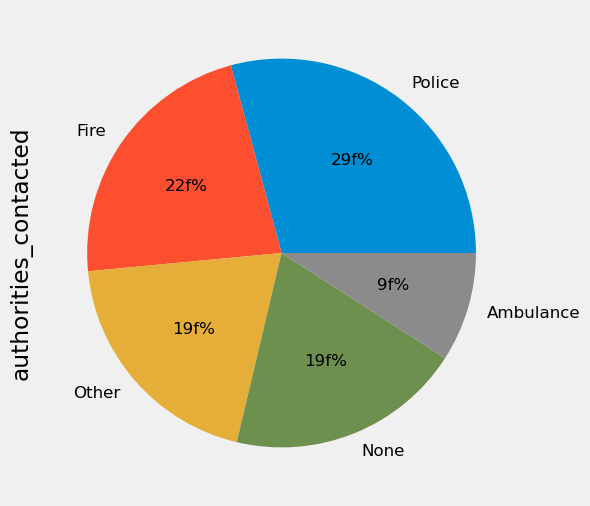

In [46]:
fig=plt.figure(figsize=(10,6))
ax = (df['authorities_contacted'].value_counts()*100.0/len(df))\
.plot.pie(autopct="%.if%%", labels = ['Police','Fire','Other','None','Ambulance'],fontsize=12)


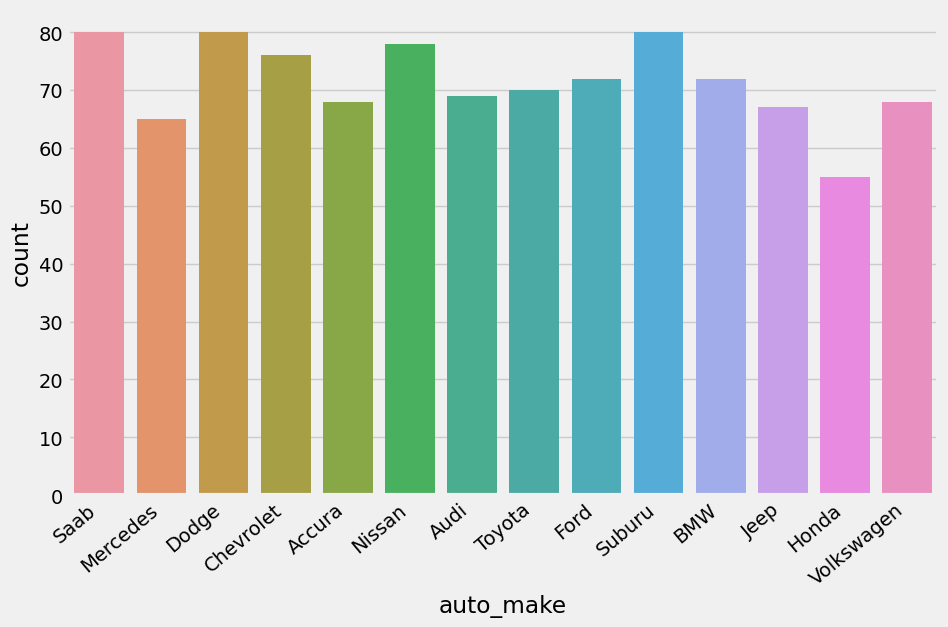

In [47]:
fig=plt.figure(figsize=(10,6))
ax =sns.countplot(x='auto_make',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

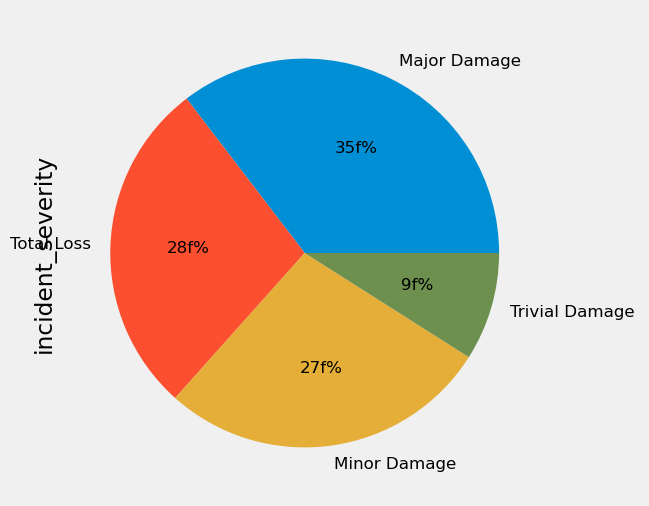

In [48]:
fig=plt.figure(figsize=(10,6))
ax=(df['incident_severity'].value_counts()*100.0/len(df))\
.plot.pie(autopct="%.if%%", labels = ['Major Damage','Total Loss','Minor Damage','Trivial Damage ','Ambulance'],fontsize=12)


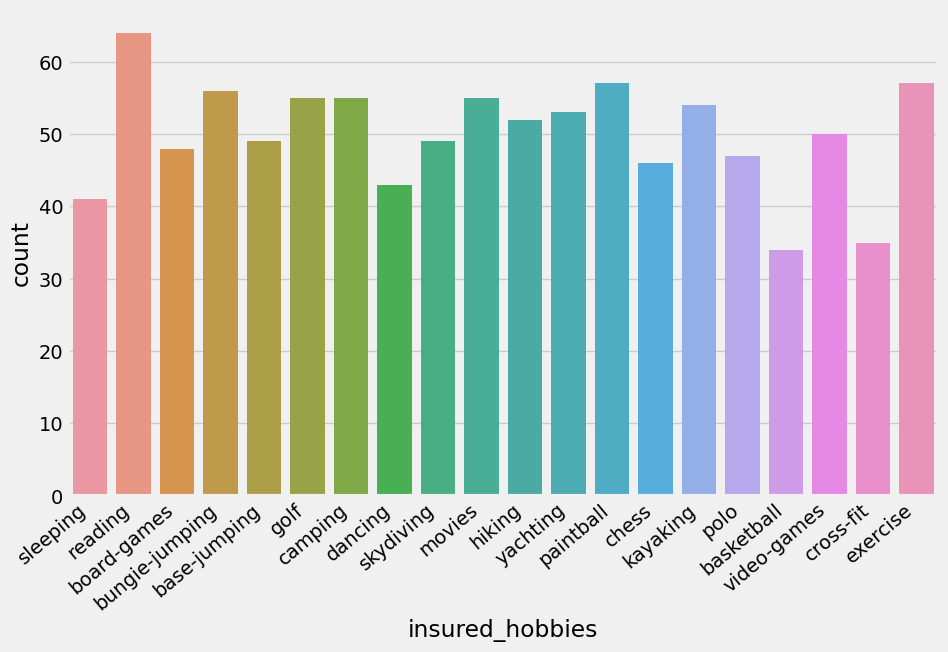

In [49]:
fig=plt.figure(figsize=(10,6))
ax =sns.countplot(x='insured_hobbies',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

In [50]:
df['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

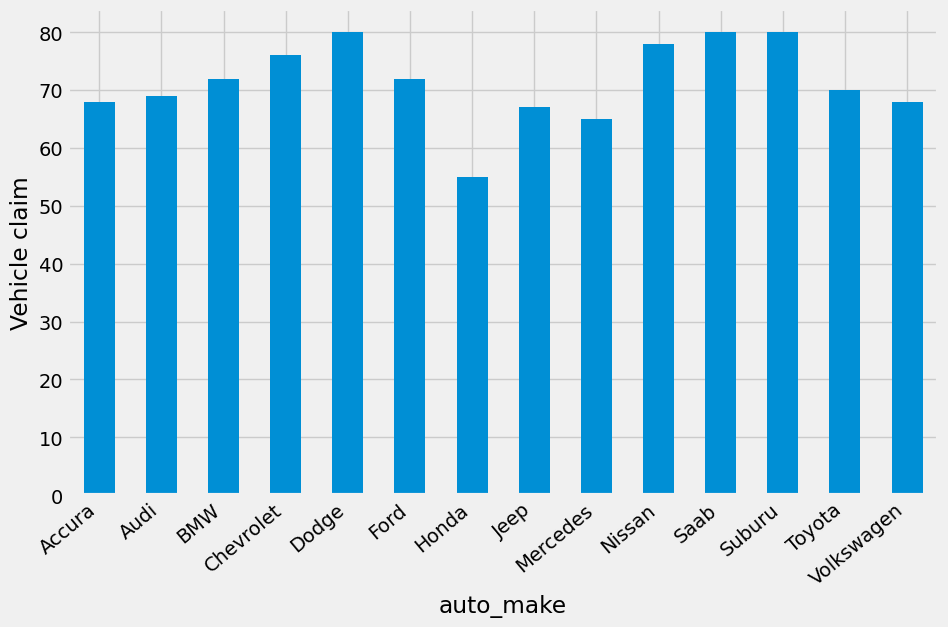

In [51]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(10,6))
ax = df.groupby('auto_make').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha ='right')
ax.set_ylabel('Vehicle claim')
plt.show()

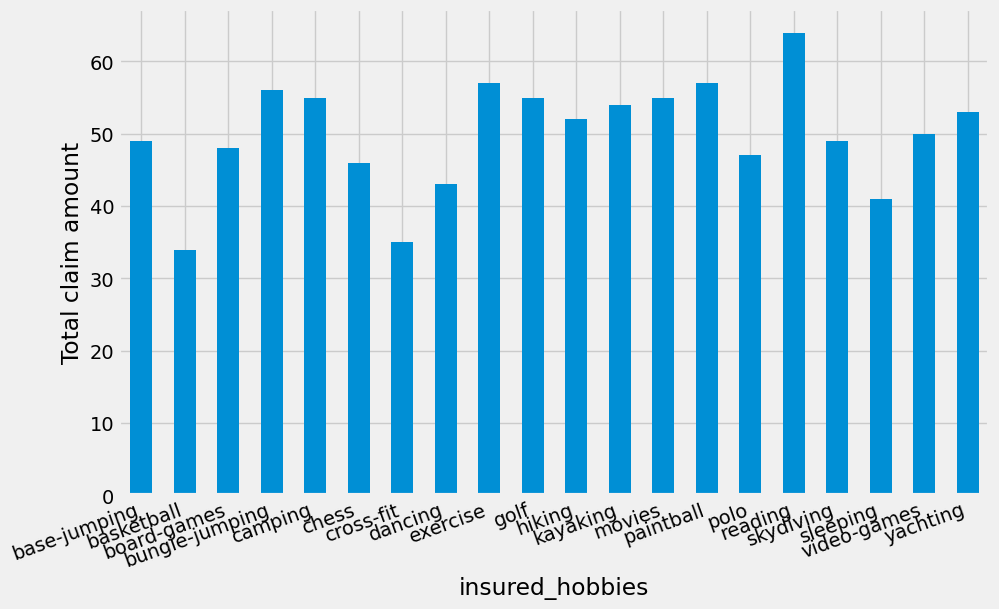

In [52]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(10,6))
ax = df.groupby('insured_hobbies').total_claim_amount.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha ='right')
ax.set_ylabel('Total claim amount')
plt.show()

# Data preprocessing

In [53]:
df['fraud_reported'].replace(to_replace='Y', value=1,inplace=True)
df['fraud_reported'].replace(to_replace='N', value=0,inplace=True)


In [54]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,1,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,1,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,0,NaN


In [55]:
df[['insured_zip']]=df[['insured_zip']].astype(object)

In [56]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000,NaN


some variable cotains very high number of level we have to remove these columns

In [57]:
df.auto_year.value_counts()

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

auto_year has 21 levels 

In [58]:
df['vehicle_age']=2018 - df['auto_year']
df['vehicle_age'].head(10)

0    14
1    11
2    11
3     4
4     9
5    15
6     6
7     3
8     6
9    22
Name: vehicle_age, dtype: int64

In [59]:
bins = [-1,3,6,9,12,17,20,24]
names = ['past_midnight','early_morning','morning','fore-noon','afternoon','evening','night']
df['incident_period_of_day']=pd.cut(df.incident_hour_of_the_day, bins,labels = names).astype(object)
df[['incident_hour_of_the_day','incident_period_of_day']].head(20)

,incident_hour_of_the_day,incident_period_of_day
0,5,early_morning
1,8,morning
2,7,morning
3,5,early_morning
4,20,evening
5,19,evening
6,0,past_midnight
7,23,night
8,21,night
9,14,afternoon


In [60]:
df.select_dtypes(include=['object']).columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_zip',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_date',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'incident_period_of_day'],
      dtype='object')

In [61]:
#dropping unwanted columns
df= df.drop(columns = ['policy_number','insured_zip','policy_bind_date','incident_date','incident_location','_c39','auto_year','incident_hour_of_the_day'])


In [62]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_period_of_day
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,YES,71610,6510,13020,52080,Saab,92x,1,14,early_morning
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,?,5070,780,780,3510,Mercedes,E400,1,11,morning
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,NO,34650,7700,3850,23100,Dodge,RAM,0,11,morning
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,1,4,early_morning
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,NO,6500,1300,650,4550,Accura,RSX,0,9,evening


In [63]:
# checking variables with "?" values
unknown = {}
for i in list (df.columns):
    if (df[i]).dtype ==object:
        j = np.sum(df[i]=='?')
        unknown[i] = j
unknown = pd.DataFrame.from_dict(unknown, orient = 'index')
print(unknown)

                           0
policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
incident_period_of_day     0


collision_type  ,property_damage ,         
police_report_available are contains many missing value. so first isolate them and inspect individually .

In [64]:
df.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

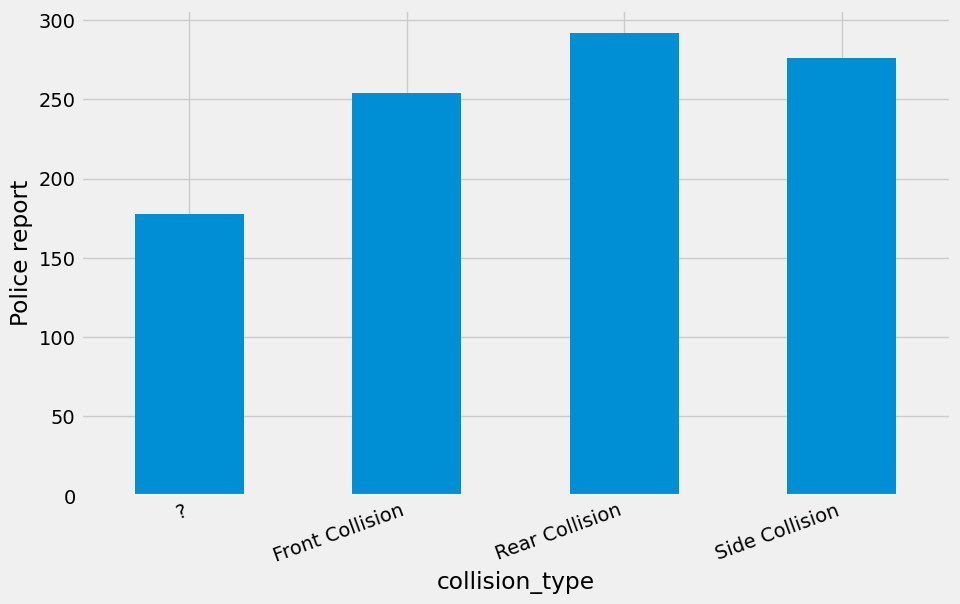

In [65]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(10,6))
ax = df.groupby('collision_type').police_report_available.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha ='right')
ax.set_ylabel('Police report')
plt.show()

In [66]:
df.property_damage.value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

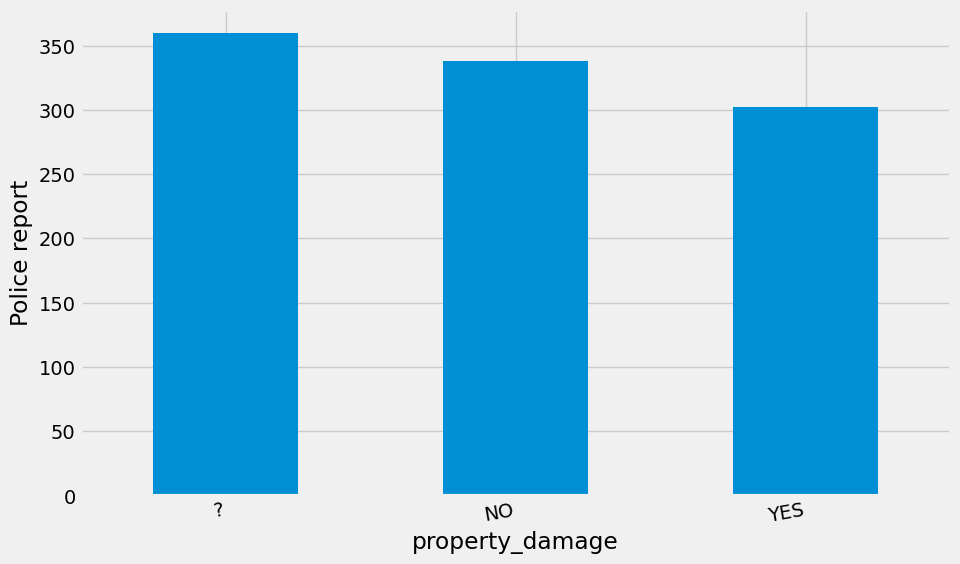

In [67]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(10,6))
ax = df.groupby('property_damage').police_report_available.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha ='right')
ax.set_ylabel('Police report')
plt.show()

In [68]:
df.police_report_available.value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [69]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported', 'vehicle_age',
       'incident_period_of_day'],
      dtype='object')

In [70]:
df._get_numeric_data().head() # checking numeric data

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,vehicle_age
0,328,48,1000,1406.91,0,53300,0,1,1,2,71610,6510,13020,52080,1,14
1,228,42,2000,1197.22,5000000,0,0,1,0,0,5070,780,780,3510,1,11
2,134,29,2000,1413.14,5000000,35100,0,3,2,3,34650,7700,3850,23100,0,11
3,256,41,2000,1415.74,6000000,48900,-62400,1,1,2,63400,6340,6340,50720,1,4
4,228,44,1000,1583.91,6000000,66000,-46000,1,0,1,6500,1300,650,4550,0,9


In [71]:
df._get_numeric_data().columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'fraud_reported', 'vehicle_age'],
      dtype='object')

In [72]:
df.select_dtypes(include=['object']).columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'incident_period_of_day'],
      dtype='object')

# Applying one-hot encoding to convert all categorical variables expect out target variable

In [73]:
dummies = pd.get_dummies(df[['policy_state','policy_csl',                                      
'insured_sex',                  
'insured_education_level' ,         
'insured_occupation' ,            
'insured_hobbies' ,                
'insured_relationship',
'incident_type',                  
'incident_severity',                
'authorities_contacted' ,           
'incident_state' ,                  
'incident_city' ,           
'auto_make',                        
'auto_model' ,    
'incident_period_of_day']])
 
dummies=dummies.join(df[['collision_type','property_damage','police_report_available','fraud_reported']])

dummies.head()

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,collision_type,property_damage,police_report_available,fraud_reported
0,0,0,1,0,1,0,0,1,0,0,...,1,0,0,0,0,0,Side Collision,YES,YES,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,?,?,?,1
2,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,Rear Collision,NO,NO,0
3,1,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,Front Collision,?,NO,1
4,1,0,0,0,0,1,0,1,1,0,...,0,1,0,0,0,0,?,NO,NO,0


In [74]:
x= dummies.iloc[:,0:-1]
y= dummies.iloc[:,-1]

In [75]:
len(x.columns)

145

In [76]:
x.head()

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,collision_type,property_damage,police_report_available
0,0,0,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,Side Collision,YES,YES
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,?,?,?
2,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,Rear Collision,NO,NO
3,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,Front Collision,?,NO
4,1,0,0,0,0,1,0,1,1,0,...,0,0,1,0,0,0,0,?,NO,NO


In [77]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

# Label Encoding

In [78]:
from sklearn.preprocessing import LabelEncoder
x['collision_en']=LabelEncoder().fit_transform(dummies['collision_type'])
x[['collision_type','collision_en']]


,collision_type,collision_en
0,Side Collision,3
1,?,0
2,Rear Collision,2
3,Front Collision,1
4,?,0
...,...,...
995,Front Collision,1
996,Rear Collision,2
997,Side Collision,3
998,Rear Collision,2


In [79]:
x['property_damage'].replace(to_replace='YES',value=1,inplace =True)
x['property_damage'].replace(to_replace='NO',value=0,inplace =True)
x['property_damage'].replace(to_replace='?',value=0,inplace =True)
x['police_report_available'].replace(to_replace='YES',value=1,inplace =True)
x['police_report_available'].replace(to_replace='NO',value=0,inplace =True)
x['police_report_available'].replace(to_replace='?',value=0,inplace =True)
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_period_of_day
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,YES,71610,6510,13020,52080,Saab,92x,1,14,early_morning
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,?,5070,780,780,3510,Mercedes,E400,1,11,morning
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,NO,34650,7700,3850,23100,Dodge,RAM,0,11,morning
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,1,4,early_morning
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,NO,6500,1300,650,4550,Accura,RSX,0,9,evening


In [80]:
x=x.drop(columns=['collision_type'])
x.head()

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,property_damage,police_report_available,collision_en
0,0,0,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,3
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,2
3,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,0,0,0,0,1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0


In [81]:
x=pd.concat([x,df._get_numeric_data()],axis=1)
x.head()

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,vehicle_age
0,0,0,1,0,1,0,0,1,0,0,...,0,1,1,2,71610,6510,13020,52080,1,14
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,5070,780,780,3510,1,11
2,0,0,1,1,0,0,1,0,0,0,...,0,3,2,3,34650,7700,3850,23100,0,11
3,1,0,0,0,1,0,1,0,0,0,...,-62400,1,1,2,63400,6340,6340,50720,1,4
4,1,0,0,0,0,1,0,1,1,0,...,-46000,1,0,1,6500,1300,650,4550,0,9


In [82]:
x.columns

Index(['policy_state_IL', 'policy_state_IN', 'policy_state_OH',
       'policy_csl_100/300', 'policy_csl_250/500', 'policy_csl_500/1000',
       'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       ...
       'capital-loss', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'fraud_reported', 'vehicle_age'],
      dtype='object', length=161)

In [83]:
x=x.drop(columns=['fraud_reported'])
x.columns

Index(['policy_state_IL', 'policy_state_IN', 'policy_state_OH',
       'policy_csl_100/300', 'policy_csl_250/500', 'policy_csl_500/1000',
       'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       ...
       'capital-gains', 'capital-loss', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'vehicle_age'],
      dtype='object', length=160)

now we have a dataset that we could use to evalute an algothm sesitive to missing values like LDA.

In [84]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import  cross_val_score
model = LinearDiscriminantAnalysis()
KFold = KFold(n_splits=5)
result = cross_val_score(model,x,y, cv = KFold,scoring='accuracy')
print(result.mean())

0.841


84.1 ACCURACY without standardizing the data . this looks good to go for Random Forest Classification method.

# Train Test Split

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=1234)
print('length of x_train and x_test:', len(x_train), len(x_test))
print('length of y_train and y_test:', len(y_train), len(y_test))


length of x_train and x_test: 800 200
length of y_train and y_test: 800 200


# Random Forest Classificatoion

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, cohen_kappa_score
from sklearn import metrics 
rfc = RandomForestClassifier(criterion ='gini',n_estimators=1000, verbose=1,n_jobs =-1, class_weight = 'balanced', max_features ='auto')
rfcg = rfc.fit(x_train,y_train)
predictions = rfcg.predict(x_test)

print('Baseline: N_features:',len(list(x.columns)))
print('Baseline: Accuracy:', round(accuracy_score(y_test,predictions)*100, 2))
print('Cohen Kappa: '+ str(np.round(cohen_kappa_score,(y_test,predictions), 3)))
print('Baseline: Recall: ', round(recall_score(y_test,predictions)*100, 2))
print('\n Classification Report :\n',classification_report (y_test,predictions))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.1s finished


Baseline: N_features: 160
Baseline: Accuracy: 72.5


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.1s finished


TypeError: an integer is required (got type tuple)

In [106]:
rfcg

RandomForestClassifier(class_weight='balanced', n_estimators=1000, n_jobs=-1,
                       verbose=1)

Confusion matrix
[[131   8]
 [ 47  14]]


NameError: name 'plt_tight_layout' is not defined

<Figure size 640x480 with 0 Axes>

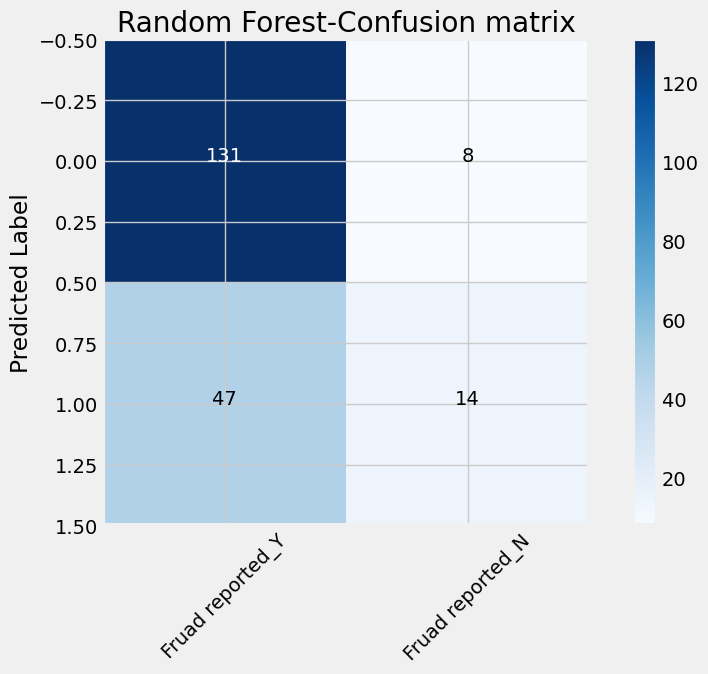

In [108]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title = 'confusion_matrix', normalize=False,cmap= plt.cm.Blues):
    """ 
     This Function prints and plots the confusion matrix.
     Normalization can be applied by setting 'normalize = True'."""
    print('Confusion matrix')
    
    print(cm)
    
    fig = plt.figure(figsize=(10,6))
    plt.style.use('fivethirtyeight')
    plt.imshow(cm,interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.xticks(tick_marks,classes)
    
    fmt ='.2f'if normalize else 'd'
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j],fmt),
                 horizontalalignment='center',
                 color='white' if cm[i,j] > thresh else 'black')
        
    plt.ylabel('True Label')
    plt.ylabel('Predicted Label')
    plt_tight_layout()
        
 #compute confusion matrix
cnf_matrix=confusion_matrix(y_test,predictions)
np.set_printoptions(precision=2)
        
#ploting non-normalize confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['Fruad reported_Y','Fruad reported_N',],
                     title='Random Forest-Confusion matrix')

# with 72% accuracy , we take a closer look at the confusion matrix:
    - 131 transactions were classified as valid that were  actually valid.
    - 8  transactions were classified as fraud that were  actually valid(type 1 error)
    
    - 47  transactions were classified as valid were  fraud (type 2 error)
    - 14  transactions were classified as fraud
    

In [ ]:
#generate a histogram plot for anomaly detection
df.plot(kind='hist')
plt.show()

In [87]:
#minimum and maximum premium
print('Minimum premium ' +str(df['policy_annual_premium'].min()))
print('Maximum premium ' +str(df['policy_annual_premium'].max()))

Minimum premium 433.33
Maximum premium 2047.59


In [88]:
#maximum and minimum age of vehicle
print('Vehicle age-minimum ' +str(df['vehicle_age'].min()))
print('Vehicle age-maximum ' +str(df['vehicle_age'].max()))

Vehicle age-minimum 3
Vehicle age-maximum 23


In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [90]:

from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [91]:
logreg2= LogisticRegressionCV(solver='lbfgs',cv=10)
knn = KNeighborsClassifier(5)
scv = SVC()
adb = AdaBoostClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
rfc=RandomForestClassifier()




LR: 0.801250 (0.038099)


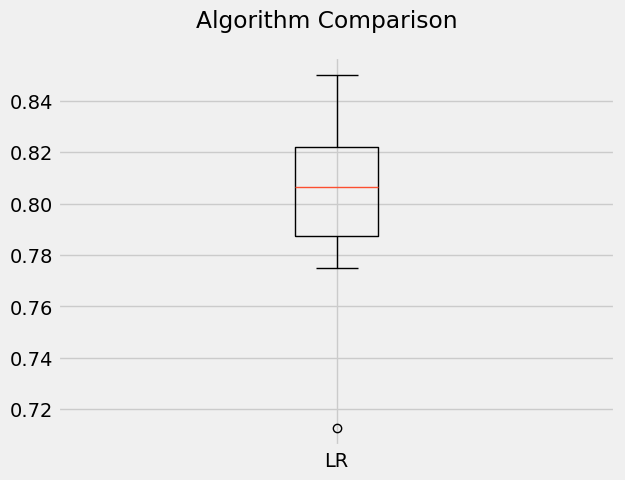

KNN: 0.742500 (0.043732)


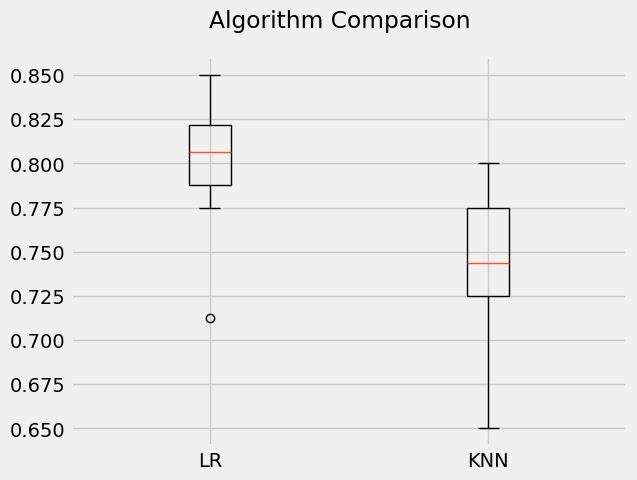

DT: 0.762500 (0.070931)


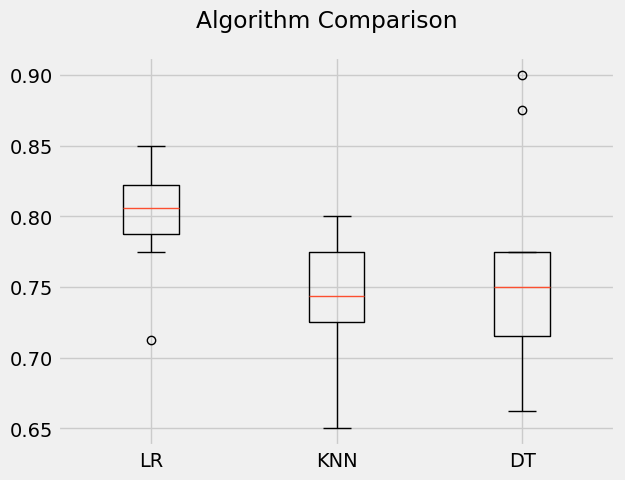

SVM: 0.776250 (0.055467)


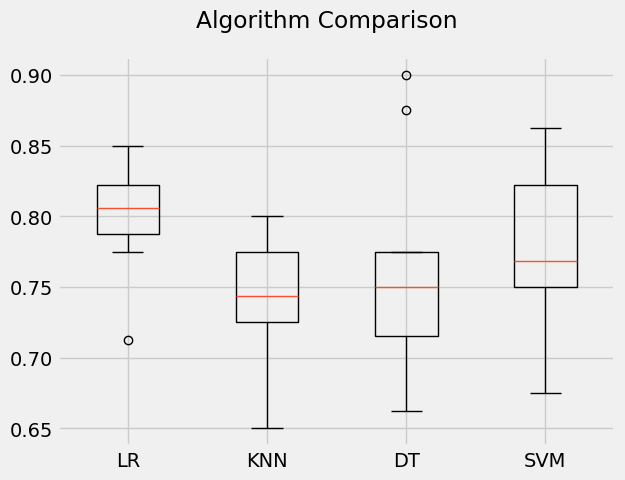

RF: 0.763750 (0.017185)


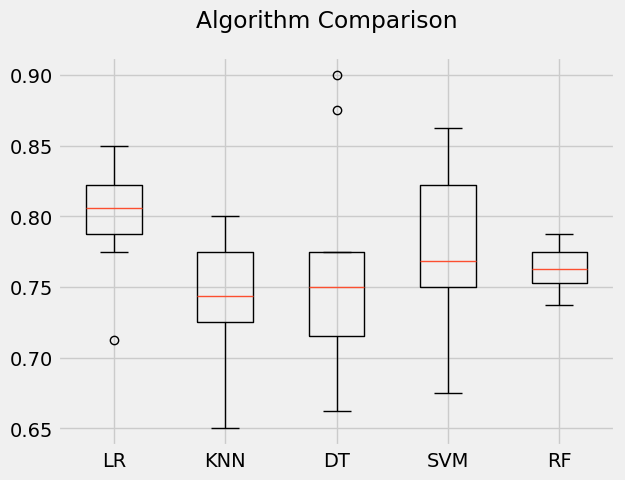

ADA: 0.808750 (0.039941)


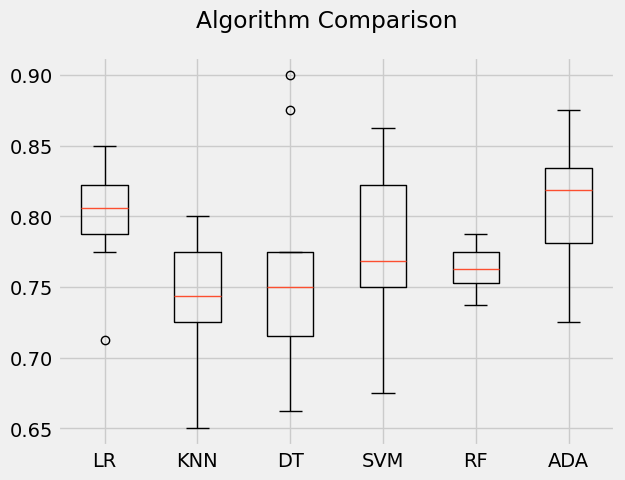

In [105]:
#preparing configration for cross val test harness
seed=7
#model preparing
models=[]
models.append(('LR',LogisticRegressionCV(solver='lbfgs',cv=10,max_iter=5000)))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('SVM',SVC(gamma='auto')))
models.append(('RF',RandomForestClassifier(n_estimators=100)))
models.append(('ADA',AdaBoostClassifier(n_estimators=100)))

#evaluate each model
results =[]
names =[]
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10,shuffle= True)
    cv_results = model_selection.cross_val_score(model, x_train_scaled,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    #boxplotalgorthm comparision
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

it is clear that the LR and LDA is good enough for both feature selection (80% and 84 accuracy with 100 features) as well as model  selection .